In [30]:
import numpy as np
import math
import bezier
import matplotlib.pyplot as plt
from transforms3d.euler import euler2mat

In [31]:
s_vals = np.linspace(0.0, 1.0, 20)
step_nodes = np.asfortranarray([
    [-1.0, -1.0, 1.0, 1.0],
    [-1.0, -1.0, 1.0, 1.0],
    [-15.0, -10, -10, -15.0],
])
curve = bezier.Curve(step_nodes, degree=3)
step = curve.evaluate_multi(s_vals)

slide_nodes = np.asfortranarray([
    [1.0, -1.0],
    [1.0, -1.0],
    [-15.0, -15],
])
curve = bezier.Curve(slide_nodes, degree=1)
slide = curve.evaluate_multi(s_vals)

motion = np.concatenate((step, slide), axis=1)
motion

array([[ -1.        ,  -0.98396268,  -0.93818341,  -0.86616125,
         -0.77139525,  -0.65738446,  -0.52762793,  -0.38562473,
         -0.23487389,  -0.07887447,   0.07887447,   0.23487389,
          0.38562473,   0.52762793,   0.65738446,   0.77139525,
          0.86616125,   0.93818341,   0.98396268,   1.        ,
          1.        ,   0.89473684,   0.78947368,   0.68421053,
          0.57894737,   0.47368421,   0.36842105,   0.26315789,
          0.15789474,   0.05263158,  -0.05263158,  -0.15789474,
         -0.26315789,  -0.36842105,  -0.47368421,  -0.57894737,
         -0.68421053,  -0.78947368,  -0.89473684,  -1.        ],
       [ -1.        ,  -0.98396268,  -0.93818341,  -0.86616125,
         -0.77139525,  -0.65738446,  -0.52762793,  -0.38562473,
         -0.23487389,  -0.07887447,   0.07887447,   0.23487389,
          0.38562473,   0.52762793,   0.65738446,   0.77139525,
          0.86616125,   0.93818341,   0.98396268,   1.        ,
          1.        ,   0.89473684,   0

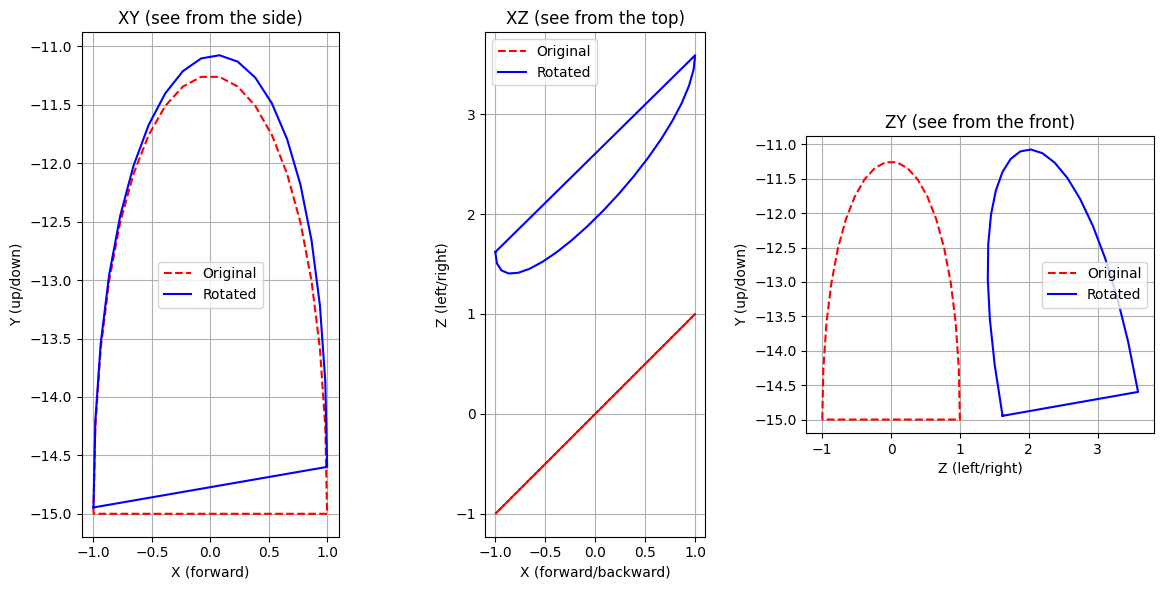

(array([[ -1.        ,  -0.98396268,  -0.93818341,  -0.86616125,
          -0.77139525,  -0.65738446,  -0.52762793,  -0.38562473,
          -0.23487389,  -0.07887447,   0.07887447,   0.23487389,
           0.38562473,   0.52762793,   0.65738446,   0.77139525,
           0.86616125,   0.93818341,   0.98396268,   1.        ,
           1.        ,   0.89473684,   0.78947368,   0.68421053,
           0.57894737,   0.47368421,   0.36842105,   0.26315789,
           0.15789474,   0.05263158,  -0.05263158,  -0.15789474,
          -0.26315789,  -0.36842105,  -0.47368421,  -0.57894737,
          -0.68421053,  -0.78947368,  -0.89473684,  -1.        ],
        [ -1.        ,  -0.98396268,  -0.93818341,  -0.86616125,
          -0.77139525,  -0.65738446,  -0.52762793,  -0.38562473,
          -0.23487389,  -0.07887447,   0.07887447,   0.23487389,
           0.38562473,   0.52762793,   0.65738446,   0.77139525,
           0.86616125,   0.93818341,   0.98396268,   1.        ,
           1.        ,  

In [32]:
momentum = np.array([1, 1, 1])
yaw_rate = 10

trajectory = motion * momentum[:, None]

original_trajectory = trajectory.copy()

# 旋轉矩陣
yaw_angle = math.radians(yaw_rate)
rotation_matrix = euler2mat(yaw_angle, 0, 0)
rotated_trajectory = rotation_matrix @ trajectory

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# 右圖：XY平面 側面圖
axes[0].plot(original_trajectory[0], original_trajectory[2], 'r--', label='Original')
axes[0].plot(rotated_trajectory[0], rotated_trajectory[2], 'b-', label='Rotated')
axes[0].set_title('XY (see from the side)')
axes[0].set_xlabel('X (forward)')
axes[0].set_ylabel('Y (up/down)')
axes[0].legend()
axes[0].grid()
axes[0].set_aspect('equal', adjustable='box')


# 中圖：XZ平面 俯視圖
axes[1].plot(original_trajectory[0], original_trajectory[1], 'r--', label='Original')
axes[1].plot(rotated_trajectory[0], rotated_trajectory[1], 'b-', label='Rotated')
axes[1].set_title('XZ (see from the top)')
axes[1].set_xlabel('X (forward/backward)')
axes[1].set_ylabel('Z (left/right)')
axes[1].legend()
axes[1].grid()
axes[1].set_aspect('equal', adjustable='box')

# 右圖：ZY平面 前視圖
axes[2].plot(original_trajectory[1], original_trajectory[2], 'r--', label='Original')
axes[2].plot(rotated_trajectory[1], rotated_trajectory[2], 'b-', label='Rotated')
axes[2].set_title('ZY (see from the front)')
axes[2].set_xlabel('Z (left/right)')
axes[2].set_ylabel('Y (up/down)')
axes[2].legend()
axes[2].grid()
axes[2].set_aspect('equal', adjustable='box')


plt.tight_layout()
plt.show()

In [33]:
original_points = np.asfortranarray([
    [-1.0, -1.0, 1.0, 1.0],
    [-1.0, -1.0, 1.0, 1.0],
    [-15.0, -10, -10, -15.0],
])
points = original_points * momentum[:, None]
rotated_points = rotation_matrix @ points

p1 = rotated_points[:,0]
p2 = rotated_points[:,1]
p3 = rotated_points[:,2]
v1 = np.array(p2) - np.array(p1)
v2 = np.array(p3) - np.array(p1)

# 計算法向量（叉積）
normal = np.cross(v1, v2)
A, B, C = normal

# 計算 D
D = -(A * p1[0] + B * p1[1] + C * p1[2])

A,B,C,D

(array([ -1.        ,   1.61991491, -14.94576447]),
 array([ -1.        ,   0.75167402, -10.02172571]),
 array([ 1.        ,  2.72128953, -9.67442935]))

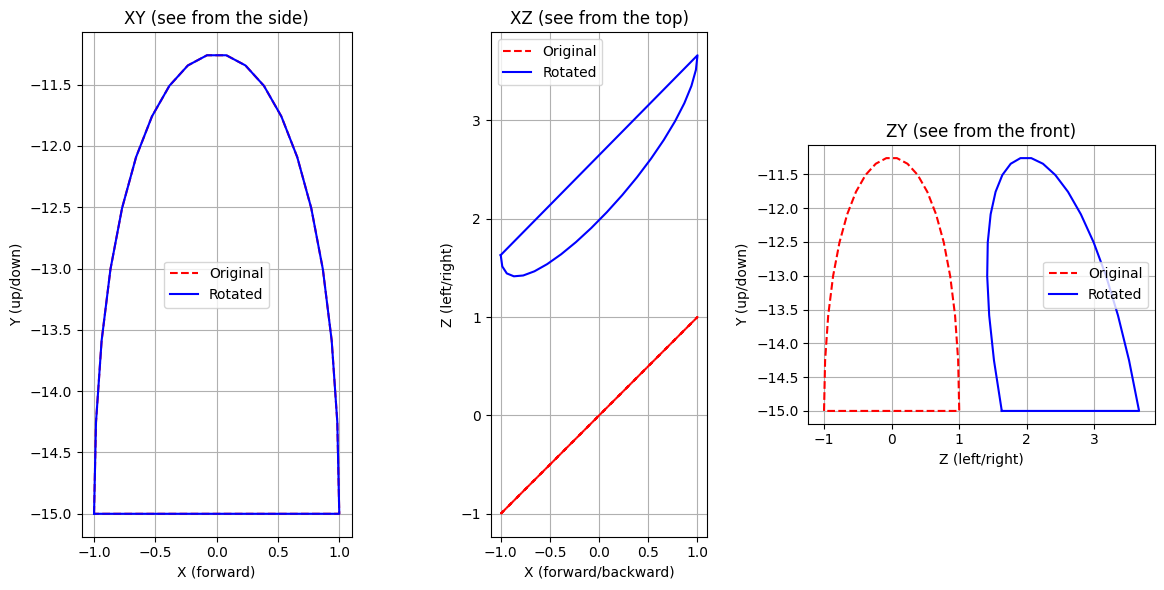

array([[ -1.        ,  -0.98396268,  -0.93818341,  -0.86616125,
         -0.77139525,  -0.65738446,  -0.52762793,  -0.38562473,
         -0.23487389,  -0.07887447,   0.07887447,   0.23487389,
          0.38562473,   0.52762793,   0.65738446,   0.77139525,
          0.86616125,   0.93818341,   0.98396268,   1.        ,
          1.        ,   0.89473684,   0.78947368,   0.68421053,
          0.57894737,   0.47368421,   0.36842105,   0.26315789,
          0.15789474,   0.05263158,  -0.05263158,  -0.15789474,
         -0.26315789,  -0.36842105,  -0.47368421,  -0.57894737,
         -0.68421053,  -0.78947368,  -0.89473684,  -1.        ],
       [  1.6294781 ,   1.51388392,   1.44314371,   1.41370445,
          1.4220131 ,   1.46451663,   1.53766201,   1.63789621,
          1.7616662 ,   1.90541895,   2.06560142,   2.23866059,
          2.42104343,   2.6091969 ,   2.79956797,   2.98860362,
          3.17275081,   3.34845651,   3.51216769,   3.66033132,
          3.66033132,   3.55344431,   3

In [ ]:
x_trajectory = trajectory[0,:]
y_trajectory = trajectory[2,:]
z_trajectory = -(A * x_trajectory + C * y_trajectory + D) / B
x_trajectory, y_trajectory, z_trajectory

adjusted_trajectory = np.asfortranarray([
    x_trajectory,
    z_trajectory,
    y_trajectory
])

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# 右圖：XY平面 側面圖
axes[0].plot(original_trajectory[0], original_trajectory[2], 'r--', label='Original')
axes[0].plot(adjusted_trajectory[0], adjusted_trajectory[2], 'b-', label='Rotated')
axes[0].set_title('XY (see from the side)')
axes[0].set_xlabel('X (forward)')
axes[0].set_ylabel('Y (up/down)')
axes[0].legend()
axes[0].grid()
axes[0].set_aspect('equal', adjustable='box')


# 中圖：XZ平面 俯視圖
axes[1].plot(original_trajectory[0], original_trajectory[1], 'r--', label='Original')
axes[1].plot(adjusted_trajectory[0], adjusted_trajectory[1], 'b-', label='Rotated')
axes[1].set_title('XZ (see from the top)')
axes[1].set_xlabel('X (forward/backward)')
axes[1].set_ylabel('Z (left/right)')
axes[1].legend()
axes[1].grid()
axes[1].set_aspect('equal', adjustable='box')

# 右圖：ZY平面 前視圖
axes[2].plot(original_trajectory[1], original_trajectory[2], 'r--', label='Original')
axes[2].plot(adjusted_trajectory[1], adjusted_trajectory[2], 'b-', label='Rotated')
axes[2].set_title('ZY (see from the front)')
axes[2].set_xlabel('Z (left/right)')
axes[2].set_ylabel('Y (up/down)')
axes[2].legend()
axes[2].grid()
axes[2].set_aspect('equal', adjustable='box')


plt.tight_layout()
plt.show()